In [3]:
# Reference - https://docs.scipy.org/doc/numpy/reference/generated/numpy.hamming.html
import numpy as np
import soundfile as sndfl
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


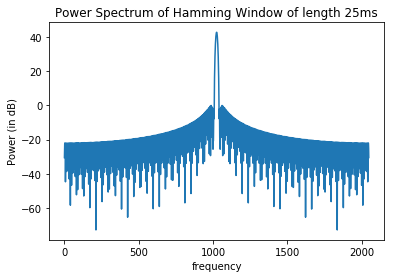

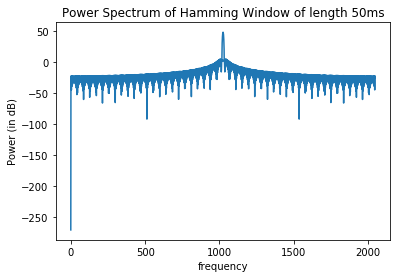

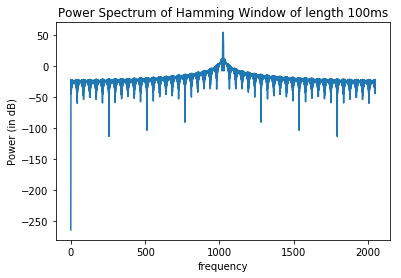

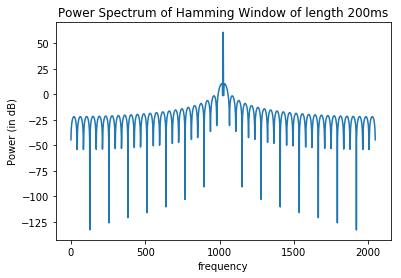

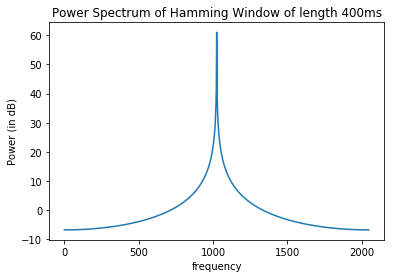

In [9]:
fs = 10000 # 10kHz
lengths = [25, 50, 100, 200, 400]
r_hamming = [] 
for i in lengths:
    plt.figure()
    window = np.hamming(fs*i/1000)
    X = np.fft.fft(window, 2048)
    mag = np.abs(np.fft.fftshift(X))
    response = 20 * np.log10(mag)
    r_hamming.append(response)
    plt.plot(response)
    plt.title("Power Spectrum of Hamming Window of length " + str(i) + "ms")
    plt.xlabel("frequency")
    plt.ylabel("Power (in dB)")
    plt.show()

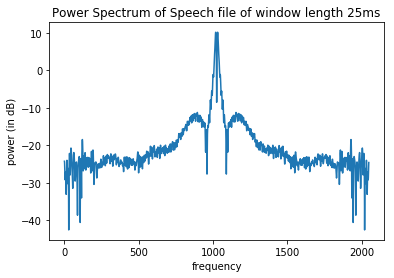

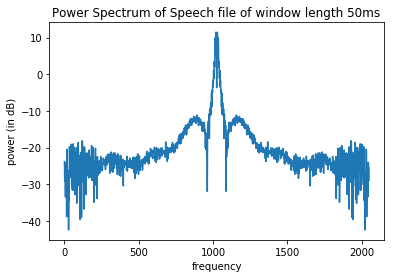

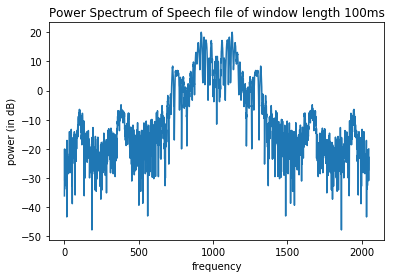

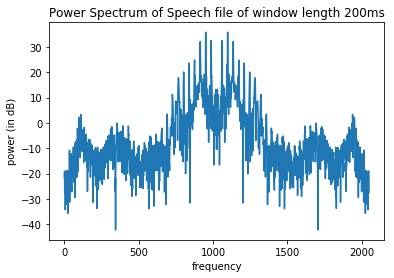

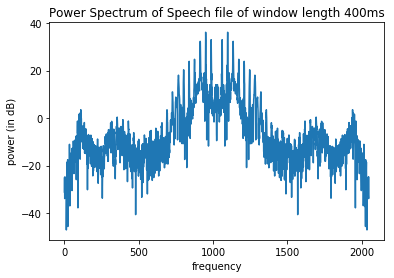

In [11]:
speech2, samp_freq = sndfl.read("speech2.wav")
ms = [25, 50, 100, 200, 400]
r_speech = []
for i in ms:
    window = speech2[:int(i*samp_freq/1000)]
    fft = np.fft.fft(window,2048)
    fft = 20*np.log10(np.abs(np.fft.fftshift(fft)))
    r_speech.append(fft)
    plt.figure()
    plt.title("Power Spectrum of Speech file of window length " + str(i) + "ms" )
    plt.xlabel("frequency")
    plt.ylabel("power (in dB)")
    plt.plot(fft)

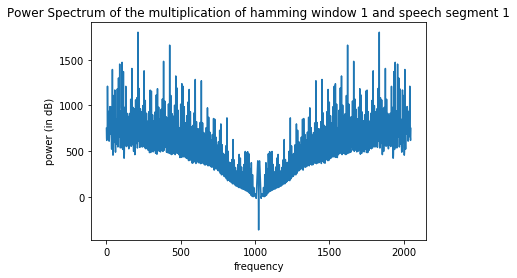

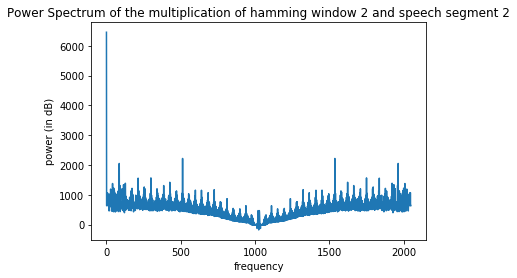

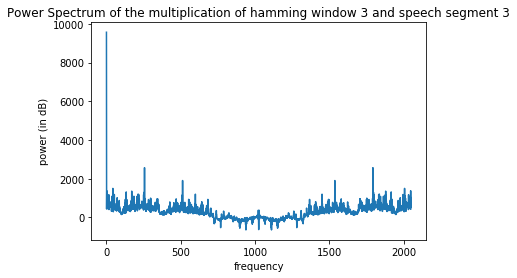

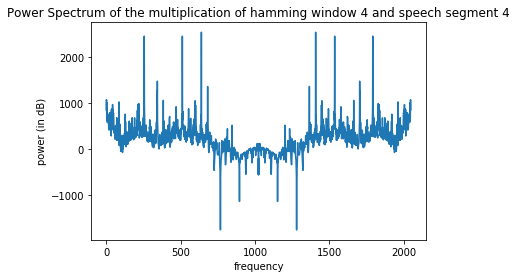

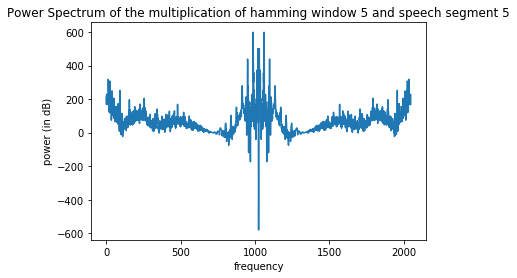

In [14]:
j = 1
for i in range(len(r_hamming)):
    ans = np.multiply(r_hamming[i], r_speech[i])
    plt.figure()
    plt.title("Power Spectrum of the multiplication of hamming window " + str(j) + " and speech segment " + str(j) )
    plt.xlabel("frequency")
    plt.ylabel("power (in dB)")
    plt.plot(ans)
    j += 1
